In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import seaborn.apionly as sns
import pandas as pd
import pcmdpy as ppy
%matplotlib inline

GPU acceleration enabled


In [2]:
try:
    ppy.gpu_utils.initialize_gpu(n=0)
    GPU_AVAIL = True
except:
    GPU_AVAIL = False

using given n: 0
Starting SourceModule Code
Past the SourceModule code
CUDAC Available


In [3]:
f = ppy.instrument.default_m51_filters()
try:
    iso_model
except NameError:
    iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model, gpu=GPU_AVAIL)

In [4]:
pcmd_data = np.loadtxt('../data/m51_gap_I-VI-BV.dat', unpack=True)

In [6]:
ssp = ppy.galaxy.DefaultSSP(np.array([0., -2., 3., 10.]))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b63dd833860>,
      dtype=object)

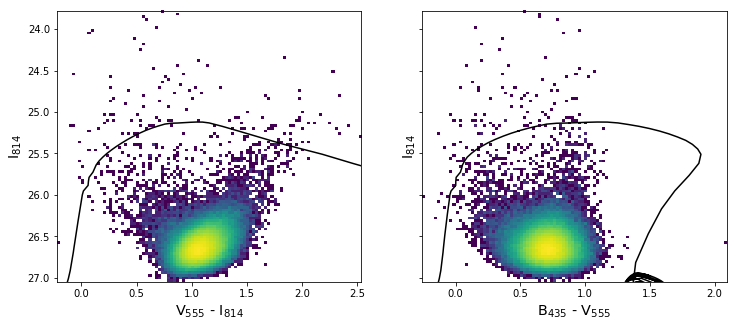

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True);
ppy.plotting.plot_pcmd(pcmd_data[:2], ax=axes[0])
ppy.plotting.plot_pcmd(pcmd_data[::2], ax=axes[1])
ppy.plotting.plot_isochrone(ssp, iso_model, axes=axes)

In [8]:
def compare_model(model, pcmd_data, bins=100, **kwargs):
    pcmd_model, _ = driv.simulate(model, 1024, fixed_seed=True, **kwargs)
    fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(12, 8), sharex='col', sharey=True)
    ppy.plotting.plot_pcmd(pcmd_data[:2], bins=bins, ax=axes[0,0])
    ppy.plotting.plot_pcmd(pcmd_data[::2], bins=bins, ax=axes[0,1])
    ppy.plotting.plot_isochrone(ssp, iso_model, axes=axes[0])
    ppy.plotting.plot_pcmd(pcmd_model[:2], bins=bins, ax=axes[1,0])
    ppy.plotting.plot_pcmd(pcmd_model[::2], bins=bins, ax=axes[1,1])
    ppy.plotting.plot_isochrone(ssp, iso_model, axes=axes[1])
    ppy.plotting.plot_pcmd_residual(pcmd_model[:2], pcmd_data[:2], ax=axes[2,0], bins=bins, im_kwargs={'cmap':'bwr_r'})
    ppy.plotting.plot_pcmd_residual(pcmd_model[::2], pcmd_data[::2], ax=axes[2,1], bins=bins, im_kwargs={'cmap':'bwr_r'})
    ppy.plotting.plot_isochrone(ssp, iso_model, axes=axes[2])
    plt.tight_layout()
    return axes

In [9]:
bins = [np.arange(-1, 3, 0.05), np.arange(23, 28, 0.05)]

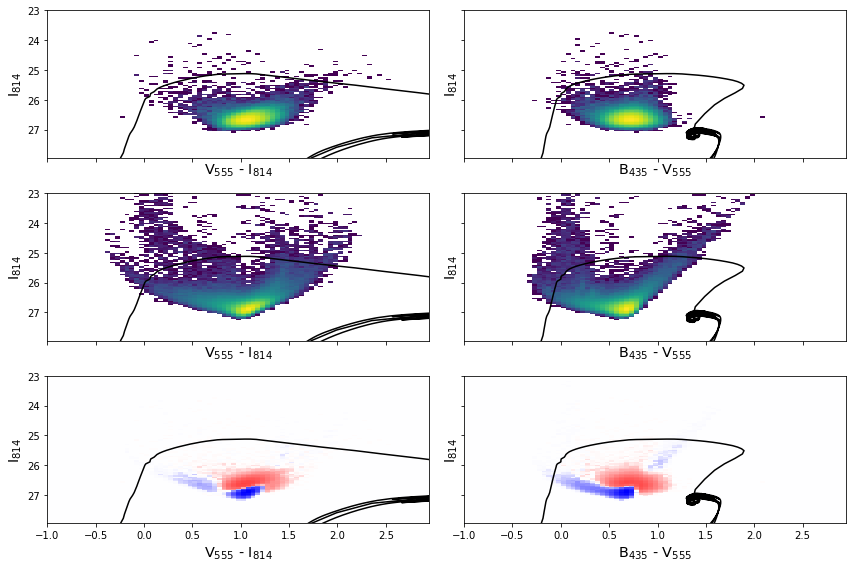

In [11]:
gal = ppy.galaxy.DefaultTau(np.array([-0., -2., 3.5, 8.]))
axes = compare_model(gal, pcmd_data, bins=bins)

In [12]:
noise = np.array([0.06, 0.03, 0.02]) * np.array([filt._exposure for filt in f])
print(noise)

[81.6 40.8 54.4]


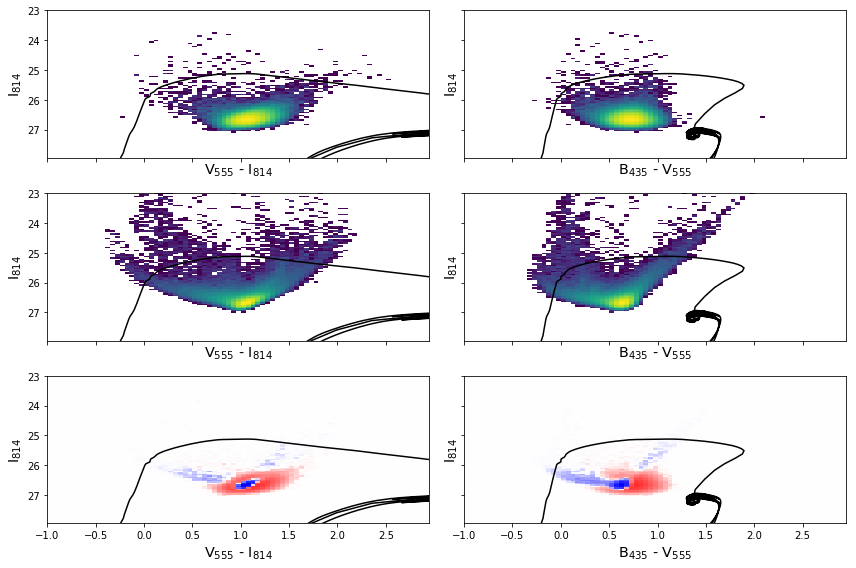

In [13]:
gal = ppy.galaxy.DefaultTau(np.array([-0., -2., 3.5, 8.]))

axes = compare_model(gal, pcmd_data, noise=noise, bins=bins,
                    shot_noise=True)